# PageRank

In [1]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

PageRank (PR) és un algorisme que *Google Search* utilitza per classificar les pàgines web en els resultats del seu motor de cerca. 
PageRank és una forma de mesurar la **importància de les pàgines del lloc web**. 

    Segons Google:
    PageRank funciona comptant el nombre i la qualitat dels enllaços a una pàgina per determinar una estimació aproximada de la importància del lloc web.
    El supòsit subjacent és que és probable que els llocs web més importants rebin més enllaços d'altres llocs web.

Actualment, PageRank no és l'únic algorisme utilitzat per Google per ordenar els resultats de la cerca, però és el primer algorisme que va utilitzar la companyia i és el més conegut.

## Introducció

Suposem que tenim una xarxa que conté $n$ pàgines, cada pàgina està indexada per un nombre enter $k$ on $1 \leq k \leq n$. 
A la figura següent es mostra un exemple típic, en què una fletxa de la pàgina 1 a la pàgina 2 indica un enllaç de la pàgina 1 a la pàgina 2. 

Aquesta web és un exemple de gràfic dirigit. Utilitzarem $x_k$ per denotar la puntuació d'importància de la pàgina $k$ a la web. 
$x_k$ no és negatiu i $x_j > x_k$ indica que la pàgina $j$ és més important que la pàgina $k$ (de manera que $x_j = 0$ indica que la pàgina $j$ té la mínima puntuació d'importància possible).

Supossa que tenim la següent estructura de pàgines:

<img src="img/page1.png" />



Si comptem el número de `in-link` (enllaços d'entrada) de cada pàgina $x$, obtenim:
$$x_1=3, x_2=2, x_3=1, x_4=3$$

Però també podem expressar-ho en funció de la pàgina de qui rebem l'enllaç, de forma que obtinguem la importància de cada web:

$$x_k = \sum_{j \in L_k} \frac{x_j}{n_j} $$

on $L_k$ denota el conjunt de pàgines amb link a $k$ i $n_j$ és el nombre de `out-links` de $j$.

Per exemple, si ho apliquem a $x_1$, obtindríem que $x_1 = \frac{x_2}{2}  + \frac{x_3}{2} + \frac{x_4}{3}$. De forma semblant, podem aplicar-ho a la resta:

$$x_1 = \frac{x_2}{2}  + \frac{x_3}{2} + \frac{x_4}{3}$$
$$x_2 = \frac{x_1}{2}  + \frac{x_4}{3} $$
$$x_3 = \frac{x_4}{3} $$
$$x_4 = \frac{x_1}{2}  + \frac{x_2}{2}  + \frac{x_3}{2} $$

Si resolem el sistema anterior, estaríem trobant la importància de cada web. La solució obtinguda seria el vector $(x_1, x_2, x_3, x_4)$. 

La resolució d'aquest tipus de sistemes no és trivial (no en casos on tenim millors de webs, és clar!). Per tal de poder avançar, el que s'acostuma a fer és resoldre-ho en forma matricial:

$$
\begin{array}{ccc}
& \text{Out-links (columnes)} &\\
G = &\begin{bmatrix}
    0 & \frac{1}{2} & \frac{1}{2} & \frac{1}{3} \\
    \frac{1}{2} & 0 & 0 & \frac{1}{3} \\
    0 & 0 & 0 & \frac{1}{3} \\
    \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & 0
\end{bmatrix} & \text{In-links (files)}
\end{array}
$$

El sistema ara es converteix en una equació, arquetip fàcilment reconegut pels matemàtics:

$$x = Gx$$

Trobareu els detalls a la publicació titulada:

`The $25,000,000,000 Eigenvector: The Linear Algebra behind Google`

Realment el que estem fent és trobar el **vector propi que té per valor propi 1**. 
És a dir, resoldre $\lambda x = Gx$ tal que $\lambda = 1$

## Mètode de la Potència 

**O com trobar el vector propi de valor propi 1**

Un dels mètodes més eficients, tot i que no el que més, és el **mètode de la potència**. Aquest, permet trobar el vector propi que té el valor propi més alt (es pot demostrar que $\lambda=1$ serà el més alt). 

El procediment iteratiu que segueix aquest mètode és:

$
i = 0\\
\text{do}\\
\hspace{2cm}y_{i+1} = G \cdot x_i\\
\hspace{2cm}x_{i+1} = \frac{y_{i+1}}{ ||y_{i+1}||_2}\\
\hspace{2cm}i = i + 1\\
\text{until }||x_{i+1} - x_{i}|| < eps
$

On $x_0$ és un vector normalitzat amb suma 1, per exemple si tenim $n$ webs en total $x_0 = (\frac{1}{n}, \dots, \frac{1}{n})$.

**Implementa l'algorisme del mètode de la potència amb numpy, seguint el pseudocodi de dalt.**

In [2]:
def power_method(G, eps=1e-6):
    """
    Donada una matriu d'adjecències, en calcula el PageRank.
    Mitjançant el mètode de la potència troba el vector propi
    de valor propi màxim (1)
    
    :param G: Matriu a calcular el PageRank
    :return: Vector d'importàncies del PageRank (vector
        propi amb valor propi més alt)
    """
    # x0 is an array 1-filled-normalized that sums 1.
    px = np.array([1/G.shape[0]]*G.shape[0])
    
    while True:
        
        y = G.dot(px)        
        nx = y/np.linalg.norm(y) # X[i + 1]
        #print(nx, " - ", px)
        # ||x[i + 1] - x[i]|| < eps
        if np.linalg.norm(nx - px) < eps:
            break
        
        px = nx
    
    return nx
    
def solve_eig(G):
    """
    Calcula els vectors i valors propis de la matriu G
    mitjançant funcions de numpy. Funció de referència
    que us pot servir per comprovar que el vostre mètode
    power_method retorna el que toca.
    
    :param G: Matriu a calcular el PageRank
    :return: Vector d'importàncies del PageRank (vector
        propi amb valor propi més alt)
    """
    vals, vecs = np.linalg.eig(G)
    idxs = np.argsort(np.real(vals))
    return np.abs(vecs[:, idxs[-1]])

In [3]:
if __name__ == '__main__':
    
    G1 = np.asarray((
        (0,     1/2.0, 1/2.0, 1/3.0), 
        (1/2.0, 0,     0,     1/3.0), 
        (0,     0,     0,     1/3.0), 
        (1/2.0, 1/2.0, 1/2.0, 0)
    ))
    x = power_method(G1)
    y = solve_eig(G1)
    
    print(np.round(G1, 2))
    print('Eigenvector', np.round(x, 2))
    print('Eigenvector', np.round(y, 2))
    print('Eigenvalues', np.round(np.linalg.eigvals(G1), 2))

[[0.   0.5  0.5  0.33]
 [0.5  0.   0.   0.33]
 [0.   0.   0.   0.33]
 [0.5  0.5  0.5  0.  ]]
Eigenvector [0.56 0.49 0.21 0.63]
Eigenvector [0.56 0.49 0.21 0.63]
Eigenvalues [ 1. +0.j -0. +0.j -0.5+0.j -0.5-0.j]


## Casos extrems

Evidentment, no tot és tan bonic com sembla... Què passa si tenim un graf no connexe?

Crea la matriu de la següent configuració i prova que passa quan n'executes el mètode de la potència:

<img src="img/page2.png" />

In [4]:
if __name__ == '__main__':
    
    G2 = np.asarray((
        (0,     1/2.0, 1/2.0, 0,   0), 
        (1/2.0, 0,     1/2.0, 0,   0), 
        (1/2.0, 1/2.0, 0,     0,   0), 
        (0,     0,     0,     0,   1.0),
        (0,     0,     0,     1.0, 0)
    ))
    x = power_method(G2)
    y = solve_eig(G2)
    
    print(np.round(G2, 2))
    print('Eigenvector', np.round(x, 2))
    print('Eigenvector', np.round(y, 2))
    print('Eigenvalues', np.round(np.linalg.eigvals(G2), 2))

[[0.  0.5 0.5 0.  0. ]
 [0.5 0.  0.5 0.  0. ]
 [0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  1. ]
 [0.  0.  0.  1.  0. ]]
Eigenvector [0.45 0.45 0.45 0.45 0.45]
Eigenvector [0.   0.   0.   0.71 0.71]
Eigenvalues [-0.5  1.  -0.5  1.  -1. ]


<hr />

* RECORDA JUSTIFICAR LA RESPOSTA

<hr />

**Quina diferència heu trobat respecte el cas anterior?**

Una part del graf no té connexió amb la resta i per tant l'algoritme del power method no convergeix a una solució correcta. PageRank parteix de la base que totes les pàgines web indexades estan connectades entre sí (directa o indirectament), per tant, en cassos on un subgraf o un subcomponent no son connectats a la resta de la xarxa no és possible aconseguir un eigenvector correcte.

I encara en trobem un més de cas extrem:

<img src="img/page3.png" />

In [5]:
if __name__ == '__main__':
    
    G3 = np.asarray((
        (0,   0, 1/2.0, 0), 
        (0,   0, 1/2.0, 0), 
        (1.0, 0, 0,     0), 
        (0,   0, 0,     0)
    ))
    #x = power_method(G3) # Comentat expressament, doncs és un bucle infinit
    y = solve_eig(G3)
    
    print(np.round(G3, 2))
    print('Eigenvector', np.round(y, 2))
    print('Eigenvalues', np.round(np.linalg.eigvals(G3), 2))

[[0.  0.  0.5 0. ]
 [0.  0.  0.5 0. ]
 [1.  0.  0.  0. ]
 [0.  0.  0.  0. ]]
Eigenvector [0.5  0.5  0.71 0.  ]
Eigenvalues [ 0.    0.71 -0.71  0.  ]


<hr />

* RECORDA JUSTIFICAR LA RESPOSTA

<hr />

**Quines diferències heu trobat respecte el casos anteriors?**

En aquest cas hi ha un node que no està connectat amb cap altre node del graf i per tant mai s'arriba a una solució. Una component del vector propi serà sempre 0 i l'algoritme mai entrarà a la condició sortida.

## Solucions

Per evitar tenir cicles, grafs separats o dangling nodes, el que es fa és modificar la matriu G afegint "soroll".
D'aquesta manera queden tots els nodes connectats. Aquesta tècnica a vegades rep el nom de "**Random Surfer**".

$$M = (1 - m) \cdot G + m \cdot S$$

On $S$ és una matriu on totes les seves components tenen valor $1/n$ amb $n$ sent la dimensió de la matriu (nombre de files / nombre de nodes) i $m$ és un nombre petit, normalment $0.15$.

**Fes una funció que donada la matriu $G$ i $m$ calculi la nova matriu $M$**

In [6]:
def fix_matrix(G, m=0.15):
    """
    Introdueix un soroll "m" a la matriu per tal de que tots els
    nodes estiguin connectats, segons la definició anterior
    
    :param G: Matriu a afegir soroll
    :param m: Soroll a afegir
    :return: Matriu amb soroll
    """
    r, c = G.shape
    # Matrix filled with 1/n in all positions, where n is the number of rows/columns in G.
    s = np.asarray([[1/r]*r]*r)
    
    # Random surfer formula
    return (1 - m)*G + m*s

In [7]:
if __name__ == '__main__':
    M2 = fix_matrix(G2)
    x = power_method(M2)
    y = solve_eig(G2)
    z = solve_eig(M2)
    
    print(np.round(M2, 2))
    print('Eigenvector', np.round(x, 2))
    print('Eigenvector', np.round(y, 2))
    print('Eigenvector', np.round(z, 2))
    print('Eigenvalues', np.round(np.linalg.eigvals(M2), 2))

[[0.03 0.45 0.45 0.03 0.03]
 [0.45 0.03 0.45 0.03 0.03]
 [0.45 0.45 0.03 0.03 0.03]
 [0.03 0.03 0.03 0.03 0.88]
 [0.03 0.03 0.03 0.88 0.03]]
Eigenvector [0.45 0.45 0.45 0.45 0.45]
Eigenvector [0.   0.   0.   0.71 0.71]
Eigenvector [0.45 0.45 0.45 0.45 0.45]
Eigenvalues [-0.43  1.    0.85 -0.43 -0.85]


In [8]:
if __name__ == '__main__':
    M3 = fix_matrix(G3)
    x = power_method(M3)
    y = solve_eig(G3)
    z = solve_eig(M3)
    
    print(np.round(M3, 2))
    print('Eigenvector', np.round(x, 2))
    print('Eigenvector', np.round(y, 2))
    print('Eigenvector', np.round(z, 2))
    print('Eigenvalues', np.round(np.linalg.eigvals(M3), 2))

[[0.04 0.04 0.46 0.04]
 [0.04 0.04 0.46 0.04]
 [0.89 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04]]
Eigenvector [0.51 0.51 0.69 0.09]
Eigenvector [0.5  0.5  0.71 0.  ]
Eigenvector [0.51 0.51 0.69 0.09]
Eigenvalues [ 0.72 -0.6   0.03  0.  ]


<hr />

* RECORDA JUSTIFICAR LA RESPOSTA

<hr />

**Quines modificacions han sofert les solucions del sistema?**

Al afegir soroll a la matriu d'adjacències, no hi ha cap component del vector propi igual a 0 i per tant s'arriba a un eigenvector correcte. Fent servir la matriu *G3* sense soroll implicava un bucle infinit doncs mai s'arribava a la condició de sortida del bucle.

# Amb els busos de Barcelona

En aquesta segona part de la pràctica heu d'aplicar l'algoritme del **PageRank** per identificar la relevancia de les estacions de Barcelona.

A diferència de la pràctica anterior, en aquesta pràctica el graf que us donem està dirigit i conté més d'un component (hi ha subgrafs no connectats entre sí).

In [9]:
def to_connections_matrix(G):
    """
    Converteix el graf G en una matriu d'adjacències i després normalitza les
    columnes per tal que sumin 1. La matriu resultant és de la forma de les
    matrius de connexions dels exercicis anteriors.
    
    Tot seguit, afegeix soroll, amb valor m=0.15, mitjançant fix_matrix.
    
    Per exemple
    Adj(G) = [
        [0 0 1 0 0 1]
        [0 1 1 0 0 0]
        [0 1 1 0 0 1]
        [0 0 0 1 0 0]
    ]
    
    connexions = [
        [0 0   1/3 0 0 1/2]
        [0 1/2 1/3 0 0 0]
        [0 1/2 1/3 0 0 1/2]
        [0 0   0   1 0 0]
    ]
    
    fixed = [
        [0.0375 0.0375 0.320   0.0375 0.0375 0.4625]
        [0.0375 0.4625 0.320   0.0375 0.0375 0.0375]
        [0.0375 0.4625 0.320   0.0375 0.0375 0.4625]
        [0.0375 0.0375 0.0375  0.8875 0.0375 0.0375]
    ]
    
    :param G: Graf de busos
    :return: Matriu de conexions amb soroll
    """
    nodes, nnodes = [*G.nodes], len(G.nodes)
    matrix = np.zeros((nnodes, nnodes))
    
    # If the adjacency matrix had to be computed manually, here's the code.
    # Since we are now working with a directed graph, the adjacency matrix needs to be computed completely
    # which is gonna take some time.
    """
    for i in range(nnodes):
        matrix[i] = [1 if (nodes[i], nodes[j]) in G.edges else 0 for j in range(nnodes)]
    """
    # Since it's pointless computing manually the adjancecy matrix (takes a lot of time & we all know 
    # how to do it), the matrix is retrieved using Networkx library.
    matrix = nx.linalg.graphmatrix.adjacency_matrix(G).toarray()
    
    # Normalizing adjacency matrix by its columns. Nan values, generated when normalizing (0/0) are
    # replaced with 0 before 'fixing' the matrix.
    norm = np.nan_to_num(matrix/np.sum(matrix, axis=1)[:, np.newaxis])
    
    # Return the fixed matrix.
    return fix_matrix(norm)

In [11]:
def importance_per_node(G, M):
    """
    Crea un diccionari on les claus són els nodes i el valor la importància
    del node segons l'algorisme de PageRank.
    
    La importància ve definida segons el vector propi correspon al valor propi
    més gran. El node en posició "i" té per importància la posició "i" d'aquest vector.
    
    :param G: El graf
    :param M: Matriu de conexions amb soroll
    :return: Diccionari node -> importància
    """
    nodes, nnodes = [*G.nodes], len(G.nodes)
    # Computing eigenvector of matrix M.
    vect = power_method(M)
    
    # Returning dictionary, where its keys are the nodes of the graph and its values their importance.
    return dict(zip(nodes, vect))

In [12]:
def plot_gragh(G, scores=None, use_colors=True):
    """
    Funció que visualitza el graf de les estacions de tren a sobre de Barcelona.
    """
    fig = plt.figure(figsize=(16, 10), constrained_layout=True)
    ax = fig.gca()
    plt.axis('off')
    
    if scores is not None:
        spec = GridSpec(ncols=2, nrows=1, width_ratios=[2, 1], height_ratios=[1], figure=fig)
        ax = plt.subplot(spec[0, 0])
    
    pos = {n: np.asarray(n) for n in G.nodes}
    colors = 'black' if not use_colors else [G.edges[e]['color'] for e in G.edges]
    
    nx.draw_networkx_edges(
        G, 
        pos=pos,
        edge_color=colors
    )
    
    apos = np.asarray(list(pos.values()))
    minx = apos.min(axis=0)
    maxx = apos.max(axis=0)
    ax.set_xlim([minx[0], maxx[0]])
    ax.set_ylim([minx[1], maxx[1]])

    if scores is not None:
        nodelist = sorted(G.nodes(), key=lambda n: scores[n])
        ncolor = np.asarray([scores[n] for n in nodelist])
        nodes = nx.draw_networkx_nodes(G, nodelist=nodelist, pos=pos, node_size=20, cmap=plt.cm.jet, node_color=ncolor, alpha=0.7)
        plt.colorbar(nodes, cmap=plt.cm.jet, orientation='horizontal')

        plt.subplot(spec[0, 1])
        score_array = np.array(list(scores.values()))
        plt.hist(score_array,bins=100)
        plt.show() 

Crida les anteriors funcions per visualitzar la importància de cada parada de bus

In [13]:
G = nx.readwrite.read_yaml('data/directed_graph.yml')

In [14]:
M = to_connections_matrix(G)

H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide


In [15]:
node_to_val = importance_per_node(G, M)

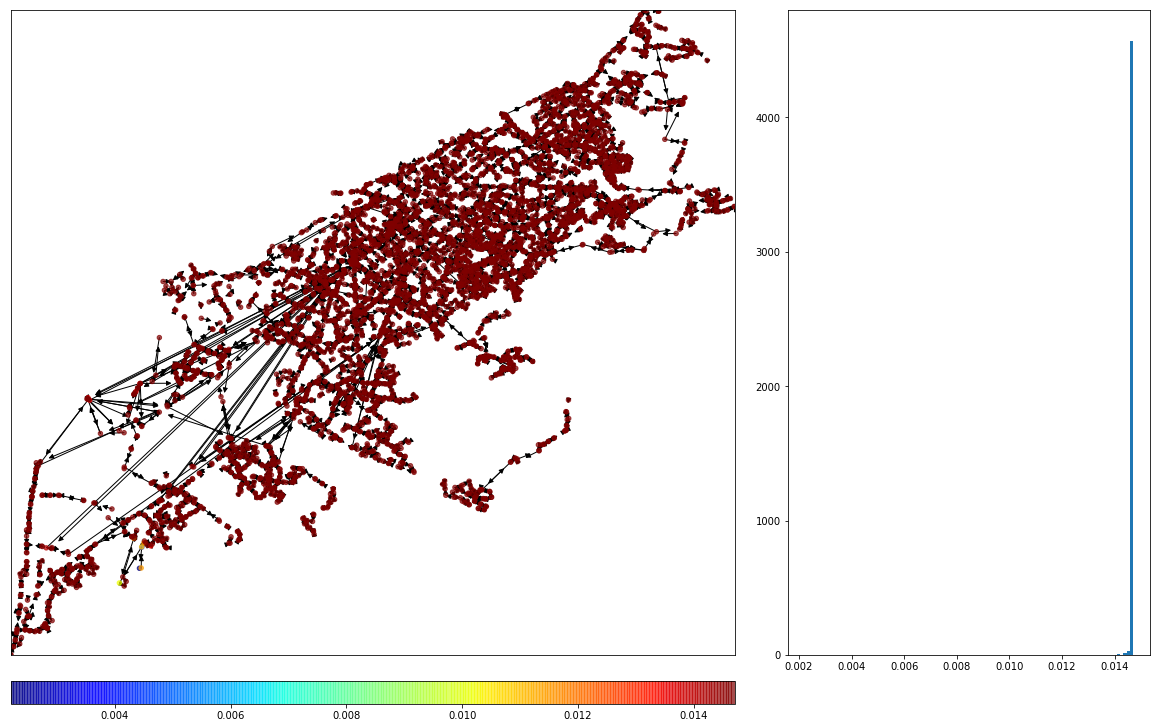

In [17]:
plot_gragh(G, node_to_val, use_colors=False)

<hr />

* RECORDA JUSTIFICAR LA RESPOSTA

<hr />

**Utilitzant les gràfiques anteriors, que vol dir que un node sigui més important que un altre?**

Un node és més important que un altre quan la  relació #entrades/#sortides és més gran. Aplicat a la xarxa de l'AMB, una parada de bus serà més important que una altre quan aquesta rebi més línies de bus de les que surten. 

Tal i com es pot veure al mapa, gran part de les parades tenen el mateix valor d'importància, doncs generalment la majoria de les parades acostumen a tenir el maitex nombre de *in-links* que de *out-links* (transbordaments). És poc comú que a una parada arribin més línies de les que surten.